In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np
import pandas as pd
import tensorflow as tf
import mlflow
from mlflow.tracking import MlflowClient
import keras

model_uri = 'models:/Classif_Xception/Staging'
model = keras.saving.load_model('dl_gcp.keras')

2025-06-09 14:56:53.341157: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-06-09 14:56:53.460479: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2025-06-09 14:56:53.460500: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2025-06-09 14:56:53.491719: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-09 14:56:54.464175: W tensorflow/stream_executor/platform/de

In [9]:
p = img.imread(f'../data/pictures_process/adaptequal_1_padded/tomo_2e1f4c.jpg')
p = p[:,:,0]
p = tf.expand_dims(p, -1)
p.shape
t = tf.expand_dims(p, axis=0)

In [12]:
model.predict(t)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


array([[0.99963355]], dtype=float32)

In [36]:
import os

def get_slice_preds(tomo_id):
    preds = []

    path = f'../data/pictures_raw/train/{tomo_id}'

    for picture in os.listdir(path):
        p = img.imread(f'{path}/{picture}')/255
        p = tf.expand_dims(p, -1)
        p = tf.image.resize(p, [960,960])
        p = tf.expand_dims(p, axis=0)
        preds.append(float(model.predict(p , verbose=0)))

    return preds

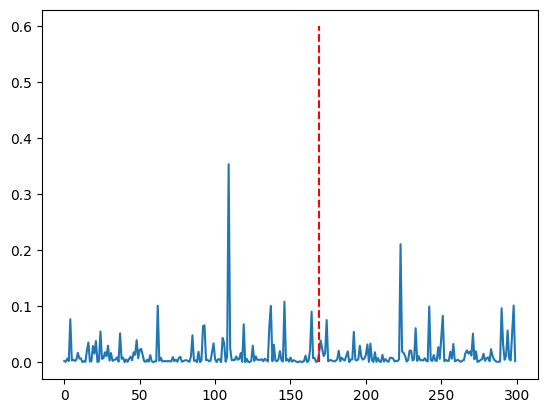

In [37]:
preds = get_slice_preds('tomo_033ebe')

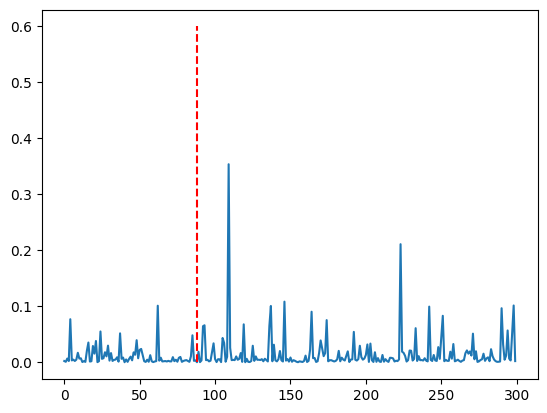

In [38]:
plt.plot(preds)
plt.vlines(x=88, ymin=0, ymax=0.6, color='r', linestyles='dashed')

In [39]:
preds = get_slice_preds('tomo_122a02')

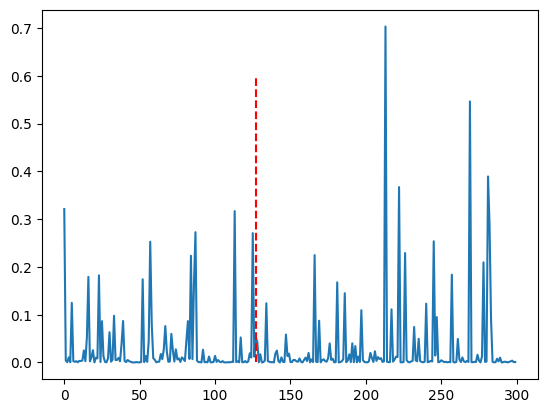

In [40]:
plt.plot(preds)
plt.vlines(x=127, ymin=0, ymax=0.6, color='r', linestyles='dashed')